# Skin Cancer Classification : Improving performance using Transfer Learning

* Dataset : http://www.fc.up.pt/addi/ph2%20database.html

* Image Dimension: 765 by 572

* 3 classes
    * Common Nevus   [0]
    * Atypical Nevus   [1]
    * Melanoma   [2]
    
    
    
* Author : Zabir Al Nazi

* Github Repository : https://github.com/zabir-nabil

* Note : Preliminary results, Thesis

* Version : 1.0



## PART I
> Dataset preparation, cleaning, pre-processing

In [1]:
# import

import numpy as np
import cv2
import matplotlib.pyplot as plt


In [16]:
# dummy pre-processing functions
def zero_pad(id):
    if(id<10):
        return '00'+str(id)
    elif(id<100):
        return '0'+str(id)
    else:
        return str(id)

In [19]:
# Testing function
print(zero_pad(5))
print(zero_pad(35))
print(zero_pad(145))

005
035
145


In [45]:
def generate_segmented_images(_class,_id,flag_show):

    _class = str(_class)
    _id = zero_pad(_id)
    
    imgpath = 'Class/'+_class+'/IMD'+_id+'/IMD'+_id+'_Dermoscopic_Image/IMD'+_id+'.bmp'  
    maskpath = 'Class/'+_class+'/IMD'+_id+'/IMD'+_id+'_lesion/IMD'+_id+'_lesion.bmp'
    img = cv2.imread(imgpath)
    msk = cv2.imread(maskpath)
    
    #cv2.imshow('Main Image',img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    if flag_show:
        plt.imshow(img)
        plt.show()
        #print(img.shape)

        plt.imshow(msk)
        plt.show()


    msk = msk/255 # normalizing
    max_channels = np.amax([np.amax(msk[:,:,0]), np.amax(msk[:,:,1]), np.amax(msk[:,:,2])])
    
    
    gen_img = img*msk
    gen_img_name =  'R:/skin_cancer/train/'+_class+'/'+_id+'.png'
    cv2.imwrite(gen_img_name,gen_img)
    if flag_show:
        print(max_channels)
        plt.imshow(gen_img)
        plt.show()




class 0, image 3


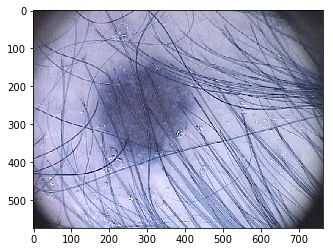

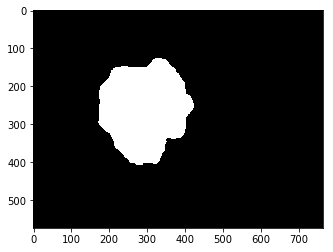

1.0


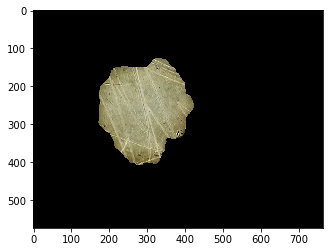

In [41]:
# Testing function
print('class 0, image 3')
generate_segmented_images(0,3,1)

class 1, image 2


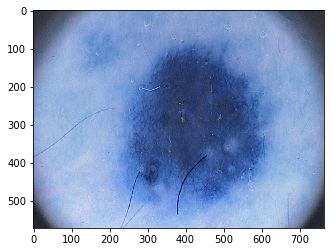

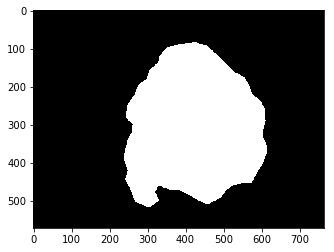

1.0


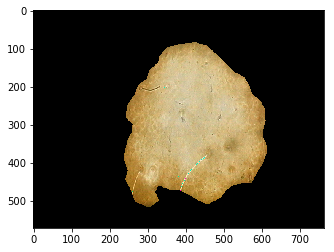

In [42]:
# Testing function
print('class 1, image 2')
generate_segmented_images(1,2,1)

class 2, image 61


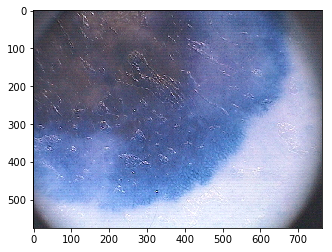

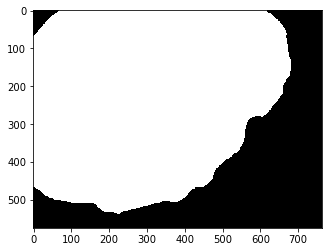

1.0


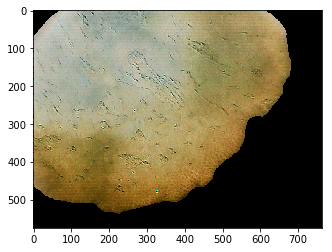

In [43]:
# Testing function
print('class 2, image 61')
generate_segmented_images(2,61,1)

In [46]:
# Total training dataset generation

class0 = [3,9,16,22,24,25,35,38,42,44,45,50,92,101,103,112,118,125,132,134]
class1 = [2,4,13,15,19,21,27,30,32,33,37,40,43,47,48,49,57,75,76,78]
class2 = [61,63,64,65,80,85,88,90,91,168,211,219,240,242,284,285,348,349,403,404]

# For class 0

for id_ in class0:
    generate_segmented_images(0,id_,0)
    
for id_ in class1:
    generate_segmented_images(1,id_,0)
    
for id_ in class2:
    generate_segmented_images(2,id_,0)
    
print('Total images generated -> ',len(class0)+len(class1)+len(class2))
    

Total images generated ->  60


## PART II
> Training a shallow ConvNet

In [50]:
import numpy as np
from skimage import color, exposure, transform

NUM_CLASSES = 3
IMG_SIZE = 150


def preprocess_img(img):
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    # central square crop
    #min_side = min(img.shape[:-1])
    #centre = img.shape[0] // 2, img.shape[1] // 2
    #img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
    #          centre[1] - min_side // 2:centre[1] + min_side // 2,
    #          :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img, -1)

    return img



In [57]:
from skimage import io
import os
import glob


root_dir = 'R:/skin_cancer/train'
imgs = []
labels = []


for img_id in class0:
    img_path = root_dir+'/0/'+zero_pad(img_id)+'.png'
    img = preprocess_img(io.imread(img_path))
    label = 0
    imgs.append(img)
    labels.append(label)
    
for img_id in class1:
    img_path = root_dir+'/1/'+zero_pad(img_id)+'.png'
    img = preprocess_img(io.imread(img_path))
    label = 1
    imgs.append(img)
    labels.append(label)
    
for img_id in class2:
    img_path = root_dir+'/2/'+zero_pad(img_id)+'.png'
    img = preprocess_img(io.imread(img_path))
    label = 2
    imgs.append(img)
    labels.append(label)

X = np.array(imgs, dtype='float32')
# Make one hot targets
Y = np.eye(NUM_CLASSES, dtype='uint8')[labels]



C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [58]:
# Demo for Y - One Hot Encoding
print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [59]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_first')


def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(3, IMG_SIZE, IMG_SIZE),
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Removed one layer

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model



In [60]:
from keras.optimizers import SGD

model = cnn_model()

# let's train the model using SGD + momentum
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



### Next cell is for training the network
> Don't execute! Gonna take around 10 minutes to train!

> Load the trained model instead!

In [61]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size = 32
epochs = 30

model.fit(X, Y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('cnn_model.h5', save_best_only=True)]
          )



Train on 48 samples, validate on 12 samples
Epoch 1/30
48/48 [==============================] - 140s 3s/step - loss: 1.0070 - acc: 0.5000 - val_loss: 2.6963 - val_acc: 0.0000e+00
Epoch 2/30
48/48 [==============================] - 26s 533ms/step - loss: 1.3975 - acc: 0.3542 - val_loss: 1.1622 - val_acc: 0.0000e+00
Epoch 3/30
48/48 [==============================] - 24s 502ms/step - loss: 1.0255 - acc: 0.3750 - val_loss: 1.5235 - val_acc: 0.0000e+00
Epoch 4/30
48/48 [==============================] - 24s 502ms/step - loss: 1.0137 - acc: 0.3333 - val_loss: 1.4900 - val_acc: 0.0000e+00
Epoch 5/30
48/48 [==============================] - 22s 465ms/step - loss: 0.9995 - acc: 0.3958 - val_loss: 1.2160 - val_acc: 0.0000e+00
Epoch 6/30
48/48 [==============================] - 21s 435ms/step - loss: 0.9670 - acc: 0.3750 - val_loss: 1.1791 - val_acc: 0.0000e+00
Epoch 7/30
48/48 [==============================] - 22s 452ms/step - loss: 0.9925 - acc: 0.4167 - val_loss: 1.0935 - val_acc: 0.7500
Epo

In [63]:
from keras.models import load_model
model = load_model('cnn_model.h5')

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 150, 150)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 148, 148)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 74, 74)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 74, 74)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 72, 72)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 36, 36)        0         
__________